     population                time        lat         lon  \
0       picoeuk 2023-02-25 05:40:00  21.306700 -157.036600   
1       picoeuk 2023-02-25 05:50:00  21.314200 -157.032100   
2     prochloro 2023-02-25 05:50:00  21.314100 -157.031633   
3       picoeuk 2023-02-25 06:00:00  21.312300 -157.016800   
4     prochloro 2023-02-25 06:00:00  21.312500 -157.019100   
...         ...                 ...        ...         ...   
4791  prochloro 2023-03-08 19:30:00  -8.781667 -180.452400   
4792    synecho 2023-03-08 19:30:00  -8.790600 -180.456000   
4793    picoeuk 2023-03-08 19:40:00  -8.799500 -180.459600   
4794  prochloro 2023-03-08 19:40:00  -8.799500 -180.459600   
4795    synecho 2023-03-08 19:40:00  -8.799500 -180.459600   

      abundance_cells_per_microliter  diameter_micrometer  depth    NO3NO2  \
0                          14.303231             1.557860    0.0  0.000562   
1                          20.716981             1.576000    0.0  0.000562   
2                    

/var/folders/w6/gkpzzsjx0n101092kzm2dnh00000gn/T/ipykernel_32384/2664385595.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  seaborn.heatmap(tn413_floats.corr().abs(),


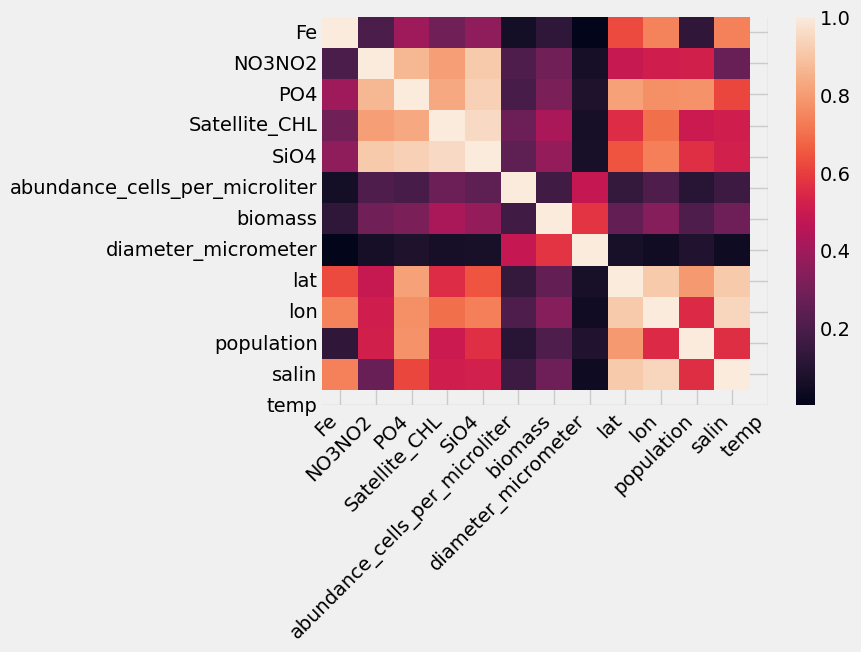

Satellite_CHL        temp                   0.512127
temp                 Satellite_CHL          0.512127
NO3NO2               lon                    0.515632
lon                  NO3NO2                 0.515632
NO3NO2               salin                  0.519497
salin                NO3NO2                 0.519497
temp                 SiO4                   0.520200
SiO4                 temp                   0.520200
lon                  salin                  0.548397
salin                lon                    0.548397
Satellite_CHL        lat                    0.555982
lat                  Satellite_CHL          0.555982
temp                 salin                  0.560286
salin                temp                   0.560286
                     SiO4                   0.563728
SiO4                 salin                  0.563728
diameter_micrometer  biomass                0.574643
biomass              diameter_micrometer    0.574643
PO4                  temp                   0.

/var/folders/w6/gkpzzsjx0n101092kzm2dnh00000gn/T/ipykernel_32384/383681926.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tn413_corr = tn413_floats.corr().abs().unstack()


In [11]:
%run /Users/cristianswift/Desktop/armbrust-lab/Seaflow-Machine-Learning/python/04_Populations-model-fitting/01_model-preparation.ipynb

## RF Regressor for Non Pro or Syn

In [12]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets"
train_features_non, test_features_non, train_labels_non, test_labels_non = train_test_split(features_non, label_non, test_size = 0.75, random_state = 42)

In [13]:
# Looking at the shape of the features and labels to see if they match up
print('Training Features Shape:', train_features_non.shape)
print('Training Labels Shape:', train_labels_non.shape)
print('Testing Features Shape:', test_features_non.shape)
print('Testing Labels Shape:', test_labels_non.shape)

Training Features Shape: (314, 7)
Training Labels Shape: (314,)
Testing Features Shape: (943, 7)
Testing Labels Shape: (943,)


In [14]:
# We are using a regressor RF model because we are predicting on continous values
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf_non = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Use the Training data to build the model
rf_non.fit(train_features_non, train_labels_non);
joblib.dump(rf_non, "/Users/cristianswift/Desktop/armbrust-lab/Seaflow-Machine-Learning/RF_models/random_forest_non.joblib")

['/Users/cristianswift/Desktop/armbrust-lab/Seaflow-Machine-Learning/RF_models/random_forest_non.joblib']

In [15]:
# Use the forest's predict method on the test data
predictions_non = rf_non.predict(test_features_non)
# Calculate the absolute errors
errors = abs(predictions_non - test_labels_non)
# Print out the mean absolute error (mae)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_labels_non, predictions_non)
print('Mean Absolute Error:', round(mae, 2), 'pgC per L.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels_non)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.36 pgC per L.
Accuracy: 89.88 %.


In [16]:
# Get numerical feature importances
importances = list(rf_non.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

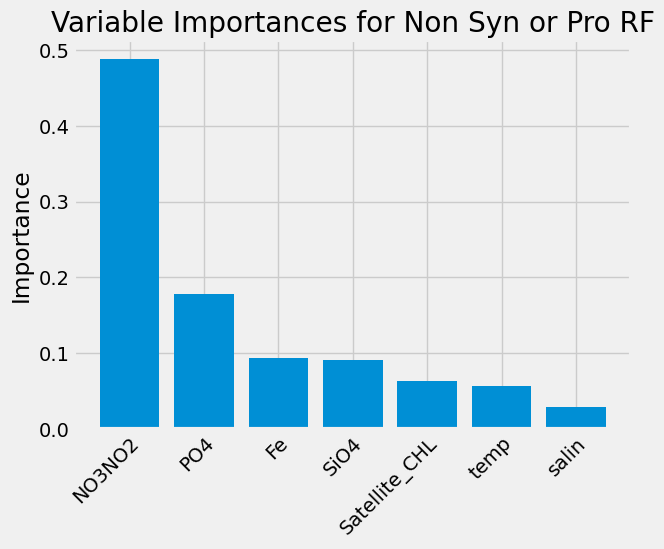

In [17]:
non_feature_importance = pd.DataFrame(rf_non.feature_importances_, index=feature_list).sort_values(by=0, ascending=False)

# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# Make a bar chart
plt.bar(x=non_feature_importance.index,height=non_feature_importance[0], orientation = 'vertical')
# Tick labels for x axis
plt.xticks(non_feature_importance.index, feature_list, rotation=45, ha='right', rotation_mode='anchor')

# Axis labels and title
plt.ylabel('Importance'); plt.title('Variable Importances for Non Syn or Pro RF');

(0.0, 41.000008290914934)

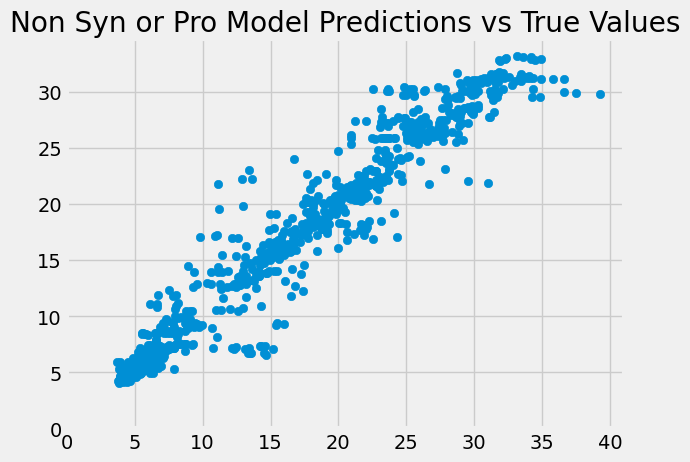

In [18]:
fig, ax = plt.subplots()
ax.scatter(test_labels_non, predictions_non)
ax.set_title('Non Syn or Pro Model Predictions vs True Values')
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)


# run the model on each individual populaton - see which does best
#put zero values when 